In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import numpy as np
from scipy.spatial import distance
import math
import statistics

In [44]:
#filter specific file names
luminance = 'star_Light_Luminance_5_secs_001_reduced_matched.csv'
#luminance = 'RZ_Cep_Light_Luminance_10_secs_001_reduced_matched.csv'
red = 'star_Light_Red_30_secs_001_reduced_matched.csv'
green = 'star_Light_Green_30_secs_001_reduced_matched.csv'
blue = 'star_Light_Blue_30_secs_001_reduced_matched.csv'

#set current filter
# ref_csv_name = luminance
current_filter = 'Luminance'

#define file read path and the file list, excluding the first file
#read_path = Path(f'./RZ Cep/All_RZ_Cep/2023_02_23/RZ_Cep/CSVs/Matched Stars/{current_filter}')
read_path = Path(f'./RZ Cep/All_RZ_Cep/2023_11_10/RZ_Cep/CSVs/Matched Stars/{current_filter}')
file_list = [f for f in os.listdir(read_path)if f.endswith('.csv') and f != ref_csv_name]

final_csv_path = Path('./RZ Cep/All_RZ_Cep/Light Curve CSVs/')
final_csv_name = '2023_11_10_normalised_curve_1.csv'

In [45]:
#column names for reference dataframe
mag_name = 'instrumental_mag'
mag_error_name = 'mag_error'
corr_mag_name = 'corrected_mag'
corr_mag_x_name = 'corrected_mag_x'
date_time_name = 'date_time'
exp_time_name = 'exp_time'
star_id_name = 'star_id'
x_pos_name = 'x_center'
y_pos_name = 'y_center'

In [46]:
reference_image = pd.read_csv(f'./RZ Cep/All_RZ_Cep/2023_01_23/RZ_Cep/CSVs/Matched Stars/Luminance/star_Light_Luminance_10_secs_001_reduced_matched.csv')
reference_image.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [47]:
def find_position_estimates(dataframe):
    pos_est = {}
    all_past_positions = {}

    for idx, row in dataframe.iterrows():
        star_name = row['star_id']
        if star_name not in all_past_positions:
            all_past_positions[star_name] = [[row[x_pos_name], row[y_pos_name]]]
        else:
            all_past_positions[star_name].append([row[x_pos_name], row[y_pos_name]])

    for key, array in all_past_positions.items():
        pos_est[key] = np.mean(array, axis=0)

#     print(pos_est)
    return pos_est

pos_est_reference = find_position_estimates(reference_image)

In [48]:
def drop_duplicate_stars(dataframe, position_estimates):
    for group_index, group in dataframe.groupby(['star_id']):
#         print(group)
        position_differences = []
        for idx, row in group.iterrows():
            star_name = row['star_id']
            current_position = [row[x_pos_name], row[y_pos_name]]
            pos_diff = distance.euclidean(current_position, position_estimates[star_name])
            position_differences.append([idx, abs(pos_diff)])
#        first number, min index, second number: min dist star index in group
        good_idx = np.argmin(position_differences, axis=0)[1]
        dataframe.drop(index=[position_differences[i][0] for i in range(len(position_differences)) if i != good_idx], 
                       inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.drop(columns=['index'], inplace=True)
     
drop_duplicate_stars(reference_image, pos_est_reference)
reference_image

C:\Users\local_es2143\Temp\ipykernel_19800\739405976.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_index, group in dataframe.groupby(['star_id']):


,x_center,y_center,annulus_bkg,counts,sky_corrected_counts,counts_error,flux,flux_error,instrumental_mag,mag_error,...,FWHM,date_time,exp_time,sharpness,roundness_sym,roundness_gauss,ellipticity,ra_from_astrometry_deg,dec_from_astrometry_deg,star_id
0,2371.940087,1757.232620,1.005194e+06,5.497275e+06,4.492082e+06,2119.453129,4.492082e+06,2119.453129,-16.631119,-0.000512,...,12.082512,2023-01-23T20:55:06.901,10.0,0.474937,0.596587,-0.395633,0.070063,339.806596,64.859566,V* RZ Cep
1,3205.813255,1039.548902,9.887176e+05,2.681512e+06,1.692794e+06,1301.074272,1.692794e+06,1301.074272,-15.571510,-0.000834,...,12.082512,2023-01-23T20:55:06.901,10.0,0.550610,0.532326,-0.205552,0.029410,339.534453,64.766797,TYC 4273-435-1
2,290.805842,3145.616991,9.972489e+05,3.177346e+06,2.180097e+06,1476.515321,2.180097e+06,1476.515321,-15.846190,-0.000735,...,12.082512,2023-01-23T20:55:06.901,10.0,0.547309,0.473637,-0.481361,0.020908,340.367305,65.099819,TYC 4273-1351-1
3,3053.174850,59.338928,1.003149e+06,1.708791e+06,7.056417e+05,840.024802,7.056417e+05,840.024802,-14.621461,-0.001293,...,12.082512,2023-01-23T20:55:06.901,10.0,0.473839,0.545074,-0.095644,0.014333,339.237730,64.810772,UCAC4 774-052682
4,3888.112165,2087.020853,9.709024e+05,1.709809e+06,7.389066e+05,859.596763,7.389066e+05,859.596763,-14.671474,-0.001263,...,12.082512,2023-01-23T20:55:06.901,10.0,0.521340,0.346277,-0.281059,0.016433,339.819955,64.650460,BD+64 1700
5,581.413314,128.109069,9.804224e+05,1.682938e+06,7.025152e+05,838.161793,7.025152e+05,838.161793,-14.616639,-0.001295,...,12.082512,2023-01-23T20:55:06.901,10.0,0.556929,0.508719,-0.316514,0.009427,339.399591,65.137183,TYC 4273-876-1
6,1549.183181,2291.677309,9.869835e+05,1.869690e+06,8.827060e+05,939.524346,8.827060e+05,939.524346,-14.864540,-0.001156,...,12.082512,2023-01-23T20:55:06.901,10.0,0.541638,0.682450,-0.397029,0.024761,340.022579,64.955114,2MASS J22405245+6505370
7,263.058112,1543.658958,9.931842e+05,1.741324e+06,7.481394e+05,864.950497,7.481394e+05,864.950497,-14.684956,-0.001255,...,12.082512,2023-01-23T20:55:06.901,10.0,0.477419,0.703125,-0.332980,0.018918,339.864762,65.144494,LSPM J2241+6501
8,2171.615644,2684.893588,9.841531e+05,1.827776e+06,8.436225e+05,918.489266,8.436225e+05,918.489266,-14.815370,-0.001182,...,12.082512,2023-01-23T20:55:06.901,10.0,0.567938,0.474319,-0.438114,0.016579,340.107858,64.862646,IRAS 22404+6450
9,1281.889301,1551.666540,9.801696e+05,1.629272e+06,6.491024e+05,805.668893,6.491024e+05,805.668893,-14.530783,-0.001348,...,12.082512,2023-01-23T20:55:06.901,10.0,0.488699,0.769859,-0.357341,0.019243,339.806681,65.009195,TYC 4273-668-1


In [49]:
#column names for current image
# mag_name = 'Source_Mag'
# mag_error_name = 'Source_Mag_Error'
# corr_mag_name = 'Corrected_Mag'
# corr_mag_x_name = 'corrected_mag'
# corr_mag_y_name = 'Corrected_Mag'
# date_time_name = 'Date Observation'
# exp_time_name = 'Exposure time /s '
# star_id_name = 'star_id'
# x_pos_name = 'xcenter'
# y_pos_name = 'ycenter'

mag_name = 'instrumental_mag'
mag_error_name = 'mag_error'
corr_mag_name = 'corrected_mag'
corr_mag_x_name = 'corrected_mag_x'
corr_mag_y_name = 'corrected_mag_y'
date_time_name = 'date_time'
exp_time_name = 'exp_time'
star_id_name = 'star_id'
x_pos_name = 'x_center'
y_pos_name = 'y_center'

In [50]:
correction_array = []
date_time_array = []
corrected_mags = []
errors = []

for image in file_list:
    current_image = pd.read_csv(read_path / image)
    current_image.drop(columns=['Unnamed: 0'], inplace=True)
    
    current_pos_est = find_position_estimates(current_image)
    drop_duplicate_stars(current_image, current_pos_est)
        
    merged_image = pd.merge(left=reference_image, right=current_image, on='star_id', how='inner')
    merged_image.sort_values([corr_mag_x_name], inplace=True)
    
#     merged_image.drop_duplicates(subset='star_id', keep='first', inplace=True)
    merged_image['delta_mag'] = merged_image[corr_mag_x_name] - merged_image[corr_mag_y_name]
    merged_image = merged_image[merged_image.star_id!='V* RZ Cep']
    
    zp_correction = np.mean(merged_image['delta_mag'])
    zp_correction_err = np.std(merged_image['delta_mag']) / np.sqrt(float(len(merged_image['delta_mag'])))
    
    correction_array.append([zp_correction, zp_correction_err])
    
    RZ_Cep_mag = current_image.loc[current_image['star_id'] == 'V* RZ Cep'][corr_mag_name]
    error = abs(current_image.loc[current_image['star_id'] == 'V* RZ Cep'][mag_error_name])
#     print(RZ_Cep_mag)
    if len(RZ_Cep_mag) == 0:
        continue
    corrected_mags.append(float(RZ_Cep_mag + zp_correction))
    date_time_array.append(current_image[date_time_name][0])
    errors.append(float(error + zp_correction_err))

C:\Users\local_es2143\Temp\ipykernel_19800\739405976.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_index, group in dataframe.groupby(['star_id']):
C:\Users\local_es2143\Temp\ipykernel_19800\739405976.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_index, group in dataframe.groupby(['star_id']):
C:\Users\local_es2143\Temp\ipykernel_19800\739405976.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_index, group in dataframe.groupby(

C:\Users\local_es2143\Temp\ipykernel_19800\739405976.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_index, group in dataframe.groupby(['star_id']):
C:\Users\local_es2143\Temp\ipykernel_19800\739405976.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_index, group in dataframe.groupby(['star_id']):
C:\Users\local_es2143\Temp\ipykernel_19800\739405976.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_index, group in dataframe.groupby(

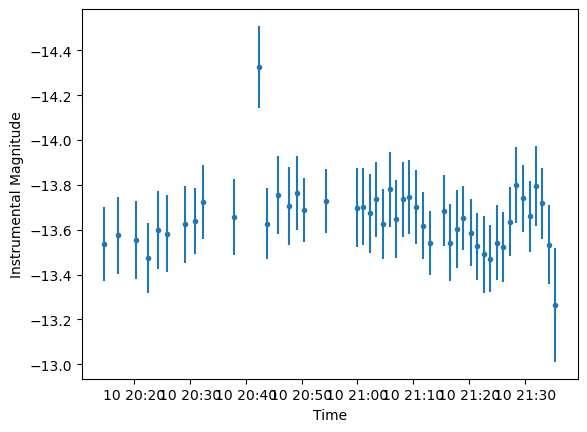

In [51]:
date_times = pd.to_datetime(date_time_array)

errors = np.asarray(errors)
corrected_mags = np.asarray(corrected_mags)

plt.errorbar(date_times, corrected_mags, yerr=errors, marker='.', ls='None')
plt.gca().invert_yaxis()
plt.xlabel('Time')
plt.ylabel('Instrumental Magnitude')
plt.show()

In [52]:
#use ap stats error or sqrt counts

df_curve = pd.DataFrame(data=(corrected_mags, errors, date_times))
df_curve = df_curve.T
df_curve.columns = ['corrected_magnitude', 'magnitude_error', 'date_time']
df_curve.to_csv(final_csv_path / final_csv_name)